In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
statement_dates = pd.read_csv('sentiment_dates.csv')
spx = pd.read_csv('.\index_data\$SPX.csv',parse_dates=['Date'])

In [82]:
dateparse = lambda x: pd.datetime.strptime(x, '%d%m%Y')
state_date_parse = lambda x: pd.datetime.strptime(x, '%Y%m%d')
spx['Date']=spx['Date'].apply(dateparse)

In [83]:
spx=spx.set_index(['Date'])

In [84]:
spx.drop(columns=['Open Interest','Ticker'], inplace=True)
spx = spx['2000-01-01':]


In [85]:
statement_dates['Statement']=np.ones(len(statement_dates))

statement_dates['Dates']=statement_dates['Dates'].apply(lambda x : str(x))

statement_dates['Dates']=statement_dates['Dates'].apply(state_date_parse)

statement_dates['Statement']=statement_dates['Statement'].apply(lambda x : int(x))

statement_dates=statement_dates.set_index(['Dates'])
statement_dates=statement_dates.drop('Unnamed: 0',axis=1)


In [86]:

spx_statements =spx.join(statement_dates, how='outer')


In [87]:
spx_statements = spx_statements[:'2019-03-01']

In [88]:
spx_statements[['Summary of Econ Projections','Statement']]=spx_statements[['Summary of Econ Projections','Statement']].fillna(0)

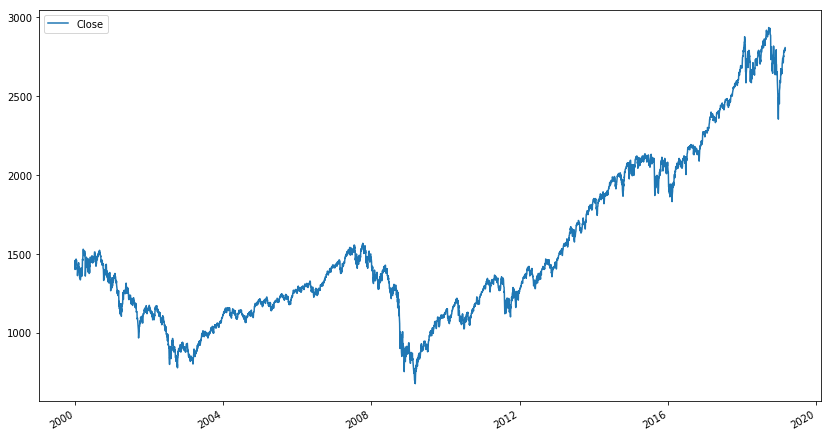

In [89]:
spx_statements.plot(y='Close',figsize=(14,8))

In [90]:
spx_statements['Close'].idxmin() 

Timestamp('2009-03-09 00:00:00')

In [91]:
spx_statements['2010-05-08':'2010-05-12']

Open        High         Low       Close        Volume  \
2010-05-09         NaN         NaN         NaN         NaN           NaN   
2010-05-10  1122.27002  1163.84998  1122.27002  1159.72998  5.925800e+09   
2010-05-11  1156.39001  1170.47998  1147.70996  1155.79004  4.776800e+09   
2010-05-12  1155.43005  1172.87000  1155.43005  1171.67004  4.323200e+09   

            Summary of Econ Projections  polarity  subjectivity  Statement  
2010-05-09                          0.0  0.028333      0.257667        1.0  
2010-05-10                          0.0       NaN           NaN        0.0  
2010-05-11                          0.0       NaN           NaN        0.0  
2010-05-12                          0.0       NaN           NaN        0.0

In [92]:
spx_statements['close_pct_change']=spx_statements.pct_change()['Close']

In [93]:
spx_statements.head()

Open        High         Low       Close        Volume  \
2000-01-03  1469.25000  1478.00000  1438.35999  1455.17004  1.153700e+09   
2000-01-04  1455.21997  1455.21997  1397.43005  1399.42004  1.216500e+09   
2000-01-05  1399.42004  1413.27002  1377.68005  1402.10999  1.422400e+09   
2000-01-06  1402.10999  1411.90002  1392.02002  1403.44995  1.322900e+09   
2000-01-07  1403.44995  1441.46997  1400.72998  1441.46997  1.472800e+09   

            Summary of Econ Projections  polarity  subjectivity  Statement  \
2000-01-03                          0.0       NaN           NaN        0.0   
2000-01-04                          0.0       NaN           NaN        0.0   
2000-01-05                          0.0       NaN           NaN        0.0   
2000-01-06                          0.0       NaN           NaN        0.0   
2000-01-07                          0.0       NaN           NaN        0.0   

            close_pct_change  
2000-01-03               NaN  
2000-01-04         -0.038312  
2000-01-05          0.001922  
2000-01-06          0.000956  
2000-01-07          0.027090

In [94]:
spx_statements['2010-05-08':'2010-05-12']

Open        High         Low       Close        Volume  \
2010-05-09         NaN         NaN         NaN         NaN           NaN   
2010-05-10  1122.27002  1163.84998  1122.27002  1159.72998  5.925800e+09   
2010-05-11  1156.39001  1170.47998  1147.70996  1155.79004  4.776800e+09   
2010-05-12  1155.43005  1172.87000  1155.43005  1171.67004  4.323200e+09   

            Summary of Econ Projections  polarity  subjectivity  Statement  \
2010-05-09                          0.0  0.028333      0.257667        1.0   
2010-05-10                          0.0       NaN           NaN        0.0   
2010-05-11                          0.0       NaN           NaN        0.0   
2010-05-12                          0.0       NaN           NaN        0.0   

            close_pct_change  
2010-05-09          0.000000  
2010-05-10          0.043974  
2010-05-11         -0.003397  
2010-05-12          0.013740

Error: one statement was released on Sunday, no comparable price change. 
This date was a Sunday. Push Effects forward

In [95]:
pd.DataFrame(spx_statements[spx_statements['Statement']==1]['close_pct_change'].describe())

close_pct_change
count        163.000000
mean           0.003171
std            0.013801
min           -0.049216
25%           -0.003873
50%            0.000911
75%            0.008906
max            0.051360

In [96]:
pd.DataFrame(spx_statements['close_pct_change'].describe())

close_pct_change
count       4820.000000
mean           0.000209
std            0.012039
min           -0.090350
25%           -0.004800
50%            0.000531
75%            0.005686
max            0.115800

In [97]:
pd.DataFrame(spx_statements[spx_statements['Statement']==0]['close_pct_change'].describe())

close_pct_change
count       4657.000000
mean           0.000105
std            0.011962
min           -0.090350
25%           -0.004827
50%            0.000524
75%            0.005581
max            0.115800

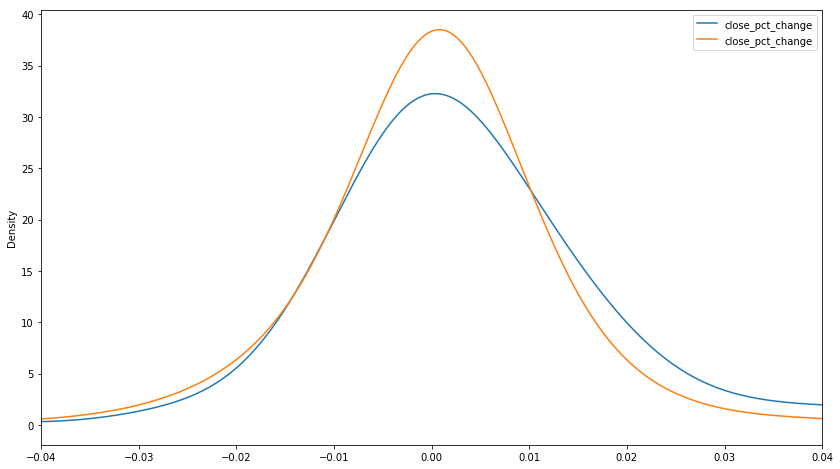

In [98]:
fig, ax = plt.subplots(figsize=(14,8))
spx_statements[spx_statements['Statement']==1]['close_pct_change'].plot.density(ax=ax,bw_method=0.5)
spx_statements['close_pct_change'].plot.density(ax=ax,bw_method=0.5)
ax.set_xlim(-0.04,0.04)
ax.legend()


In [100]:
spx_statements[['polarity', 'subjectivity']] = spx_statements[['polarity', 'subjectivity']].fillna(value=0)


In [101]:
spx_nostate = spx_statements[spx_statements['Statement']==0]['close_pct_change'].dropna()
spx_yesstate=spx_statements[spx_statements['Statement']==1]['close_pct_change']

In [102]:
sm.stats.ttest_ind(spx_yesstate,spx_nostate)

(3.1992343067139366, 0.0013868628027423105, 4818.0)

In [104]:
spx_statements[spx_statements['Statement']==0]['close_pct_change']

2000-01-03         NaN
2000-01-04   -0.038312
2000-01-05    0.001922
2000-01-06    0.000956
2000-01-07    0.027090
2000-01-10    0.011190
2000-01-11   -0.013063
2000-01-12   -0.004532
2000-01-13    0.012318
2000-01-14    0.010671
2000-01-18   -0.006832
2000-01-19    0.000522
2000-01-20   -0.007095
2000-01-21   -0.002912
2000-01-24   -0.027530
2000-01-25    0.005957
2000-01-26   -0.004213
2000-01-27   -0.003938
2000-01-28   -0.027464
2000-01-31    0.025225
2000-02-01    0.010628
2000-02-03    0.011248
2000-02-04   -0.000421
2000-02-07   -0.000091
2000-02-08    0.012294
2000-02-09   -0.020836
2000-02-10    0.003634
2000-02-11   -0.020983
2000-02-14    0.002040
2000-02-15    0.008713
                ...   
2019-01-16    0.002222
2019-01-17    0.007591
2019-01-18    0.013183
2019-01-22   -0.014157
2019-01-23    0.002203
2019-01-24    0.001376
2019-01-25    0.008489
2019-01-28   -0.007847
2019-01-29   -0.001456
2019-01-31    0.008597
2019-02-01    0.000899
2019-02-04    0.006776
2019-02-05 

In [105]:
spx_statements[spx_statements['Statement']==1]['close_pct_change']

2000-02-02   -0.000114
2000-03-21    0.025566
2000-05-16    0.009419
2000-06-28    0.002944
2000-08-22   -0.000900
2000-10-03   -0.006872
2000-11-15    0.005127
2000-12-19   -0.012958
2001-01-03    0.050099
2001-01-31   -0.005620
2001-03-20   -0.024077
2001-04-18    0.039143
2001-05-15    0.000416
2001-06-27   -0.004676
2001-08-21   -0.012079
2001-09-17   -0.049216
2001-10-02    0.012306
2001-11-06    0.014526
2001-12-11   -0.002781
2002-01-30    0.011748
2002-03-19    0.004067
2002-05-07   -0.003011
2002-06-26   -0.002684
2002-08-13   -0.021654
2002-09-24   -0.017308
2002-11-06    0.009133
2002-12-10    0.013913
2003-01-29    0.006791
2003-03-18    0.004242
2003-05-06    0.008462
                ...   
2015-06-17    0.001980
2015-07-29    0.007319
2015-09-17   -0.002561
2015-10-28    0.011840
2015-12-16    0.014515
2016-01-27   -0.010863
2016-03-16    0.005600
2016-04-27    0.001649
2016-06-15   -0.001841
2016-07-27   -0.001199
2016-09-21    0.010917
2016-11-02   -0.006526
2016-12-14 

In [106]:
poli_leader = pd.DataFrame({'Date':spx_statements.index})

In [107]:
def chairperson(x):
    if '2006-01-31'>=str(x)>='2000-01-01':
        return 'Greenspan'
    elif '2014-01-31'>=str(x)>='2006-02-01':
        return 'Bernanke'
    elif '2018-02-03'>=str(x)>='2014-02-03':
        return 'Yellen'
    else: 
        return 'Powell'
    
def president(x):
    if '2001-01-20'>str(x)>='2000-01-01':
        return 'Clinton'
    elif '2009-01-20'>str(x)>='2001-01-20':
        return 'Bush'
    elif '2017-01-20'>str(x)>='2009-01-20':
        return 'Obama'
    else: 
        return 'Trump'

In [108]:
poli_leader['fed_chair']=poli_leader['Date'].apply(chairperson)
poli_leader['president']=poli_leader['Date'].apply(president)

In [109]:
poli_leader.head()

Date  fed_chair president
0 2000-01-03  Greenspan   Clinton
1 2000-01-04  Greenspan   Clinton
2 2000-01-05  Greenspan   Clinton
3 2000-01-06  Greenspan   Clinton
4 2000-01-07  Greenspan   Clinton

In [110]:
poli_leader = poli_leader.set_index(['Date'])

In [111]:
poli_leader[['fed_chair','president']]=poli_leader[['fed_chair','president']].astype('category')


In [112]:
poli_leader['fed_chair']

Date
2000-01-03    Greenspan
2000-01-04    Greenspan
2000-01-05    Greenspan
2000-01-06    Greenspan
2000-01-07    Greenspan
2000-01-10    Greenspan
2000-01-11    Greenspan
2000-01-12    Greenspan
2000-01-13    Greenspan
2000-01-14    Greenspan
2000-01-18    Greenspan
2000-01-19    Greenspan
2000-01-20    Greenspan
2000-01-21    Greenspan
2000-01-24    Greenspan
2000-01-25    Greenspan
2000-01-26    Greenspan
2000-01-27    Greenspan
2000-01-28    Greenspan
2000-01-31    Greenspan
2000-02-01    Greenspan
2000-02-02    Greenspan
2000-02-03    Greenspan
2000-02-04    Greenspan
2000-02-07    Greenspan
2000-02-08    Greenspan
2000-02-09    Greenspan
2000-02-10    Greenspan
2000-02-11    Greenspan
2000-02-14    Greenspan
                ...    
2019-01-17       Powell
2019-01-18       Powell
2019-01-22       Powell
2019-01-23       Powell
2019-01-24       Powell
2019-01-25       Powell
2019-01-28       Powell
2019-01-29       Powell
2019-01-30       Powell
2019-01-31       Powell
2019-02-01 

In [113]:
spx_statements=spx_statements.join(poli_leader,how='inner')

In [114]:
spx_statements[spx_statements['Summary of Econ Projections']==1]['close_pct_change'].describe()

count    46.000000
mean      0.004151
std       0.009732
min      -0.015396
25%      -0.002382
50%       0.003949
75%       0.010358
max       0.033558
Name: close_pct_change, dtype: float64

In [115]:
from pandas.plotting import autocorrelation_plot

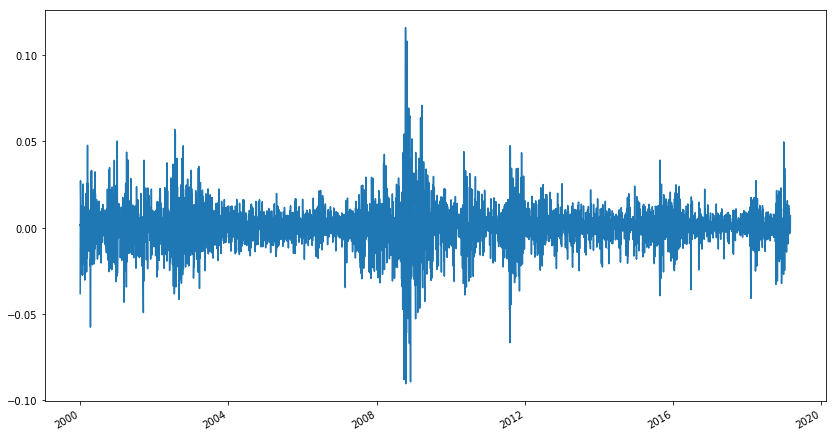

In [116]:
spx_statements['close_pct_change'].plot(figsize=(14,8))

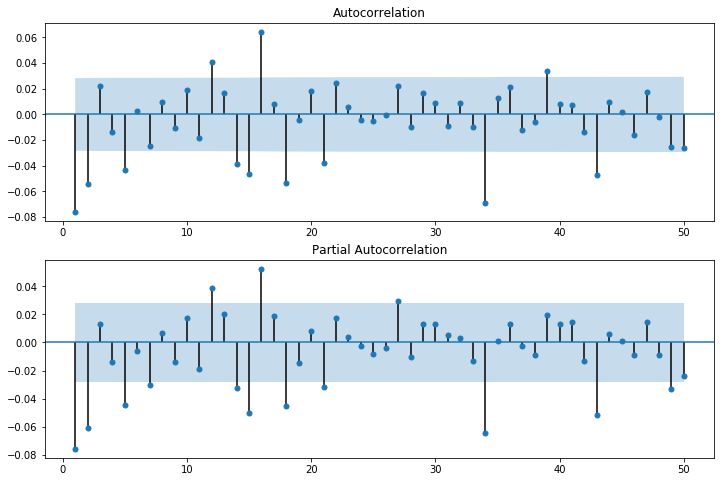

In [117]:
fig = plt.figure(figsize=(12,8))
#ax1 = fig.add_subplot(211)
#fig = sm.graphics.tsa.plot_acf(spx_statements.dropna()['Close'].values,lags = 40,ax=ax1)
ax2=fig.add_subplot(211)

fig=sm.graphics.tsa.plot_acf(spx_statements.dropna()['close_pct_change'].values,lags = 50,ax=ax2,zero=False)
ax3=fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(spx_statements.dropna()['close_pct_change'].values, lags=50, ax=ax3,zero=False)

In [118]:
sm.tsa.acf(spx_statements.dropna()['close_pct_change'],nlags = 40)

array([ 1.00000000e+00, -7.56819674e-02, -5.45150723e-02,  2.18886958e-02,
       -1.34876018e-02, -4.35480754e-02,  2.61982844e-03, -2.47996774e-02,
        1.00522097e-02, -1.05707877e-02,  1.91740920e-02, -1.86984588e-02,
        4.07468590e-02,  1.64116537e-02, -3.88177973e-02, -4.62813541e-02,
        6.42767404e-02,  8.19910332e-03, -5.31130286e-02, -4.05453183e-03,
        1.80567180e-02, -3.79553771e-02,  2.42850383e-02,  5.59723143e-03,
       -4.58465327e-03, -4.96093750e-03, -2.35000651e-04,  2.20969536e-02,
       -9.43445885e-03,  1.68619566e-02,  8.83611367e-03, -9.16853878e-03,
        9.15453513e-03, -9.71573848e-03, -6.87667084e-02,  1.28034494e-02,
        2.13196660e-02, -1.18924606e-02, -5.97384678e-03,  3.34928975e-02,
        8.32240636e-03])

In [119]:
spx_statements['Close'].autocorr(lag=500)

0.7838627732618095

In [120]:
from pandas.plotting import lag_plot

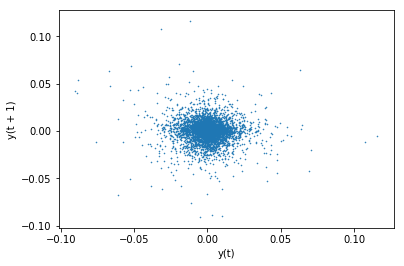

In [121]:
lag_plot(spx_statements['close_pct_change'], s= 0.3)

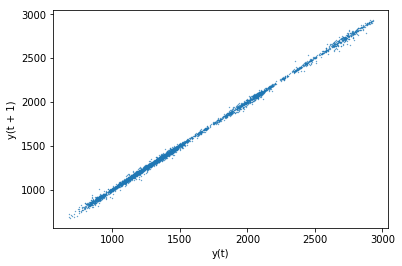

In [122]:
lag_plot(spx_statements['Close'],s =0.1)

In [123]:
arma_mod = sm.tsa.ARMA(spx_statements.dropna()['close_pct_change'], (2,0)).fit(disp=False)

C:\Users\makmi\Anaconda3\envs\econ_490\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [124]:
arma_mod.params

const                     0.000209
ar.L1.close_pct_change   -0.080430
ar.L2.close_pct_change   -0.060702
dtype: float64

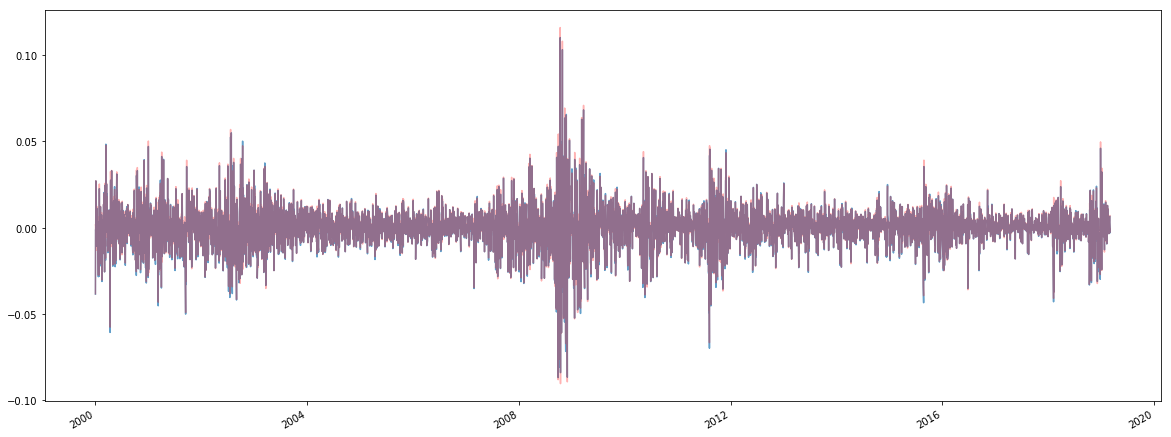

In [125]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax = arma_mod.resid.plot(ax=ax,alpha=0.7);
spx_statements.dropna()['close_pct_change'].plot(ax=ax,c='red',alpha=0.3)

In [126]:
from scipy import stats
stats.normaltest(arma_mod.resid)

NormaltestResult(statistic=767.8232784761625, pvalue=1.859060573127871e-167)

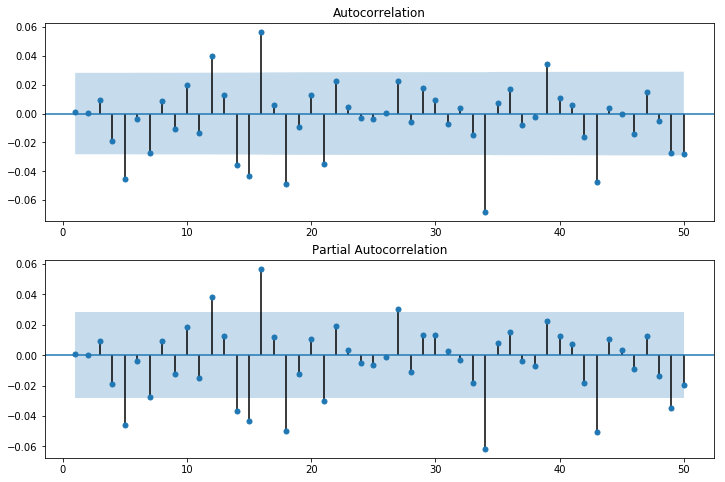

In [127]:
fig = plt.figure(figsize=(12,8))
#ax1 = fig.add_subplot(211)
#fig = sm.graphics.tsa.plot_acf(spx_statements.dropna()['Close'].values,lags = 40,ax=ax1)
ax2=fig.add_subplot(211)

fig=sm.graphics.tsa.plot_acf(arma_mod.resid,lags = 50,ax=ax2,zero=False)
ax3=fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arma_mod.resid, lags=50, ax=ax3,zero=False)

In [128]:

len(arma_mod.resid)

4819

In [129]:
resid=pd.DataFrame({'residuals':arma_mod.resid})


In [130]:
spx_statements = spx_statements.join(resid,how='inner')

In [131]:
spx_statements

Open        High         Low       Close        Volume  \
2000-01-04  1455.21997  1455.21997  1397.43005  1399.42004  1.216500e+09   
2000-01-05  1399.42004  1413.27002  1377.68005  1402.10999  1.422400e+09   
2000-01-06  1402.10999  1411.90002  1392.02002  1403.44995  1.322900e+09   
2000-01-07  1403.44995  1441.46997  1400.72998  1441.46997  1.472800e+09   
2000-01-10  1441.46997  1464.35999  1441.46997  1457.59998  1.290900e+09   
2000-01-11  1457.59998  1458.66003  1434.42004  1438.56006  1.286600e+09   
2000-01-12  1438.56006  1442.59998  1427.07996  1432.04004  1.234700e+09   
2000-01-13  1432.25000  1454.19995  1432.25000  1449.68005  1.162300e+09   
2000-01-14  1449.68005  1473.00000  1449.68005  1465.15002  1.314500e+09   
2000-01-18  1465.15002  1465.15002  1451.30005  1455.14001  1.216000e+09   
2000-01-19  1455.14001  1461.39001  1448.68005  1455.90002  1.213300e+09   
2000-01-20  1455.90002  1465.70996  1438.54004  1445.56995  1.249500e+09   
2000-01-21  1445.56995  1453.18005  1439.59998  1441.35999  1.350200e+09   
2000-01-24  1441.35999  1454.08997  1395.42004  1401.68005  1.251500e+09   
2000-01-25  1401.53003  1414.26001  1388.48999  1410.03003  1.260400e+09   
2000-01-26  1410.03003  1412.72998  1400.16003  1404.08997  1.280400e+09   
2000-01-27  1404.08997  1418.85999  1370.98999  1398.56006  1.342100e+09   
2000-01-28  1398.56006  1398.56006  1356.19995  1360.15002  1.247100e+09   
2000-01-31  1360.16003  1394.50000  1350.05005  1394.45996  1.196000e+09   
2000-02-01  1394.45996  1412.48999  1384.79004  1409.28003  1.120700e+09   
2000-02-02  1409.28003  1420.60999  1403.48999  1409.12000  1.137000e+09   
2000-02-03  1409.12000  1425.78003  1398.52002  1424.96997  1.230400e+09   
2000-02-04  1424.96997  1435.91003  1404.46997  1424.37000  1.152000e+09   
2000-02-07  1424.37000  1427.15002  1413.32996  1424.23999  9.870000e+08   
2000-02-08  1424.23999  1441.82996  1424.23999  1441.75000  1.220500e+09   
2000-02-09  1441.71997  1444.55005  1411.65002  1411.70996  1.168500e+09   
2000-02-10  1411.69995  1422.09998  1406.43005  1416.83997  1.172600e+09   
2000-02-11  1416.82996  1416.82996  1378.89001  1387.10999  1.141800e+09   
2000-02-14  1387.12000  1394.93005  1380.53003  1389.93994  9.998000e+08   
2000-02-15  1389.93994  1407.71997  1376.25000  1402.05005  1.200600e+09   
...                ...         ...         ...         ...           ...   
2019-01-17  2609.28003  2645.06006  2606.36011  2635.95996  2.480500e+09   
2019-01-18  2651.27002  2675.46997  2647.58008  2670.70996  2.634600e+09   
2019-01-22  2657.87988  2657.87988  2617.27002  2632.89990  2.614600e+09   
2019-01-23  2643.47998  2653.18994  2612.86011  2638.69995  2.269000e+09   
2019-01-24  2638.84009  2647.19995  2627.01001  2642.33008  2.462500e+09   
2019-01-25  2657.43994  2672.37988  2657.33008  2664.76001  2.537100e+09   
2019-01-28  2644.96997  2644.96997  2624.06006  2643.85010  2.326800e+09   
2019-01-29  2644.88989  2650.92993  2631.05005  2640.00000  2.183700e+09   
2019-01-30  2653.62012  2690.43994  2648.34009  2681.05005  2.576400e+09   
2019-01-31  2685.48999  2708.94995  2678.64990  2704.10010  3.423600e+09   
2019-02-01  2702.32007  2716.65991  2696.87988  2706.53003  2.445600e+09   
2019-02-04  2706.48999  2724.98999  2698.75000  2724.87012  2.089100e+09   
2019-02-05  2728.34009  2738.97998  2724.03003  2737.69995  2.211600e+09   
2019-02-06  2735.05005  2738.08008  2724.14990  2731.61011  2.071200e+09   
2019-02-07  2717.53003  2719.32007  2687.26001  2706.05005  2.476900e+09   
2019-02-08  2692.36011  2708.07007  2681.83008  2707.87988  2.222800e+09   
2019-02-11  2712.39990  2718.05005  2703.79004  2709.80005  2.035000e+09   
2019-02-12  2722.61011  2748.18994  2722.61011  2744.72998  2.309300e+09   
2019-02-13  2750.30005  2761.85010  2748.62988  2753.03003  2.165800e+09   
2019-02-14  2743.50000  2757.89990  2731.22998  2745.72998  2.156000e+09   
2019-02-15  2760.23999  2775.65991  2760.23999  2775.60010  2.3949

In [132]:
pd.DataFrame(spx_statements[spx_statements['Statement']==0]['residuals'].describe())

residuals
count  4657.000000
mean     -0.000102
std       0.011910
min      -0.086842
25%      -0.005038
50%       0.000474
75%       0.005300
max       0.109992

In [133]:
pd.DataFrame(spx_statements[spx_statements['Statement']==1]['residuals'].describe())

residuals
count  162.000000
mean     0.002888
std      0.013671
min     -0.050085
25%     -0.004461
50%      0.001138
75%      0.009104
max      0.050528

In [134]:
sm.stats.ttest_ind(spx_statements[spx_statements['Statement']==1]['residuals'],
                   spx_statements[spx_statements['Statement']==0]['residuals'])

(3.124297686077778, 0.0017928884351233844, 4817.0)

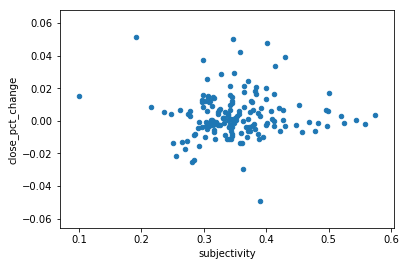

In [143]:
spx_statements[spx_statements['Statement']==1].plot.scatter('subjectivity','close_pct_change')

In [152]:
results = sm.formula.ols('close_pct_change ~ polarity + subjectivity +Statement', data=spx_statements).fit()

In [153]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       close_pct_change   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.507
Date:                Wed, 03 Apr 2019   Prob (F-statistic):             0.0147
Time:                        11:51:44   Log-Likelihood:                 14465.
No. Observations:                4819   AIC:                        -2.892e+04
Df Residuals:                    4815   BIC:                        -2.890e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0001      0.000      0.595   

In [159]:
pd.get_dummies(spx_statements,columns=['fed_chair','president'])

Open        High         Low       Close        Volume  \
2000-01-04  1455.21997  1455.21997  1397.43005  1399.42004  1.216500e+09   
2000-01-05  1399.42004  1413.27002  1377.68005  1402.10999  1.422400e+09   
2000-01-06  1402.10999  1411.90002  1392.02002  1403.44995  1.322900e+09   
2000-01-07  1403.44995  1441.46997  1400.72998  1441.46997  1.472800e+09   
2000-01-10  1441.46997  1464.35999  1441.46997  1457.59998  1.290900e+09   
2000-01-11  1457.59998  1458.66003  1434.42004  1438.56006  1.286600e+09   
2000-01-12  1438.56006  1442.59998  1427.07996  1432.04004  1.234700e+09   
2000-01-13  1432.25000  1454.19995  1432.25000  1449.68005  1.162300e+09   
2000-01-14  1449.68005  1473.00000  1449.68005  1465.15002  1.314500e+09   
2000-01-18  1465.15002  1465.15002  1451.30005  1455.14001  1.216000e+09   
2000-01-19  1455.14001  1461.39001  1448.68005  1455.90002  1.213300e+09   
2000-01-20  1455.90002  1465.70996  1438.54004  1445.56995  1.249500e+09   
2000-01-21  1445.56995  1453.18005  1439.59998  1441.35999  1.350200e+09   
2000-01-24  1441.35999  1454.08997  1395.42004  1401.68005  1.251500e+09   
2000-01-25  1401.53003  1414.26001  1388.48999  1410.03003  1.260400e+09   
2000-01-26  1410.03003  1412.72998  1400.16003  1404.08997  1.280400e+09   
2000-01-27  1404.08997  1418.85999  1370.98999  1398.56006  1.342100e+09   
2000-01-28  1398.56006  1398.56006  1356.19995  1360.15002  1.247100e+09   
2000-01-31  1360.16003  1394.50000  1350.05005  1394.45996  1.196000e+09   
2000-02-01  1394.45996  1412.48999  1384.79004  1409.28003  1.120700e+09   
2000-02-02  1409.28003  1420.60999  1403.48999  1409.12000  1.137000e+09   
2000-02-03  1409.12000  1425.78003  1398.52002  1424.96997  1.230400e+09   
2000-02-04  1424.96997  1435.91003  1404.46997  1424.37000  1.152000e+09   
2000-02-07  1424.37000  1427.15002  1413.32996  1424.23999  9.870000e+08   
2000-02-08  1424.23999  1441.82996  1424.23999  1441.75000  1.220500e+09   
2000-02-09  1441.71997  1444.55005  1411.65002  1411.70996  1.168500e+09   
2000-02-10  1411.69995  1422.09998  1406.43005  1416.83997  1.172600e+09   
2000-02-11  1416.82996  1416.82996  1378.89001  1387.10999  1.141800e+09   
2000-02-14  1387.12000  1394.93005  1380.53003  1389.93994  9.998000e+08   
2000-02-15  1389.93994  1407.71997  1376.25000  1402.05005  1.200600e+09   
...                ...         ...         ...         ...           ...   
2019-01-17  2609.28003  2645.06006  2606.36011  2635.95996  2.480500e+09   
2019-01-18  2651.27002  2675.46997  2647.58008  2670.70996  2.634600e+09   
2019-01-22  2657.87988  2657.87988  2617.27002  2632.89990  2.614600e+09   
2019-01-23  2643.47998  2653.18994  2612.86011  2638.69995  2.269000e+09   
2019-01-24  2638.84009  2647.19995  2627.01001  2642.33008  2.462500e+09   
2019-01-25  2657.43994  2672.37988  2657.33008  2664.76001  2.537100e+09   
2019-01-28  2644.96997  2644.96997  2624.06006  2643.85010  2.326800e+09   
2019-01-29  2644.88989  2650.92993  2631.05005  2640.00000  2.183700e+09   
2019-01-30  2653.62012  2690.43994  2648.34009  2681.05005  2.576400e+09   
2019-01-31  2685.48999  2708.94995  2678.64990  2704.10010  3.423600e+09   
2019-02-01  2702.32007  2716.65991  2696.87988  2706.53003  2.445600e+09   
2019-02-04  2706.48999  2724.98999  2698.75000  2724.87012  2.089100e+09   
2019-02-05  2728.34009  2738.97998  2724.03003  2737.69995  2.211600e+09   
2019-02-06  2735.05005  2738.08008  2724.14990  2731.61011  2.071200e+09   
2019-02-07  2717.53003  2719.32007  2687.26001  2706.05005  2.476900e+09   
2019-02-08  2692.36011  2708.07007  2681.83008  2707.87988  2.222800e+09   
2019-02-11  2712.39990  2718.05005  2703.79004  2709.80005  2.035000e+09   
2019-02-12  2722.61011  2748.18994  2722.61011  2744.72998  2.309300e+09   
2019-02-13  2750.30005  2761.85010  2748.62988  2753.03003  2.165800e+09   
2019-02-14  2743.50000  2757.89990  2731.22998  2745.72998  2.156000e+09   
2019-02-15  2760.23999  2775.65991  2760.23999  2775.60010  2.3949

In [165]:
results_2 = sm.formula.ols('residuals ~ polarity + subjectivity +C(president)', data=spx_statements).fit()

In [166]:
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:              residuals   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.028
Date:                Wed, 03 Apr 2019   Prob (F-statistic):            0.00987
Time:                        12:09:39   Log-Likelihood:                 14490.
No. Observations:                4819   AIC:                        -2.897e+04
Df Residuals:                    4813   BIC:                        -2.893e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [172]:
results_3 = sm.formula.ols('close_pct_change ~Statement +C(president) +C(fed_chair)', data=spx_statements).fit()

In [169]:
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:       close_pct_change   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.238
Date:                Wed, 03 Apr 2019   Prob (F-statistic):             0.0285
Time:                        12:27:50   Log-Likelihood:                 14468.
No. Observations:                4819   AIC:                        -2.892e+04
Df Residuals:                    4811   BIC:                        -2.887e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [170]:
spx_statements['abs_return']=spx_statements['close_pct_change'].abs()

In [173]:
results_4 = sm.formula.ols('abs_return ~Statement +C(president) +C(fed_chair)', data=spx_statements).fit()
print(results_4.summary())

                            OLS Regression Results                            
Dep. Variable:             abs_return   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     26.72
Date:                Wed, 03 Apr 2019   Prob (F-statistic):           3.41e-36
Time:                        12:45:00   Log-Likelihood:                 15960.
No. Observations:                4819   AIC:                        -3.190e+04
Df Residuals:                    4811   BIC:                        -3.185e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [174]:
spx_statements['abs_return'].describe()

count    4819.000000
mean        0.008012
std         0.008990
min         0.000000
25%         0.002165
50%         0.005335
75%         0.010692
max         0.115800
Name: abs_return, dtype: float64

In [175]:
results_5 = sm.formula.ols('abs_return ~polarity+ subjectivity', data=spx_statements).fit()
print(results_5.summary())

                            OLS Regression Results                            
Dep. Variable:             abs_return   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.201
Date:                Wed, 03 Apr 2019   Prob (F-statistic):             0.0150
Time:                        12:47:25   Log-Likelihood:                 15872.
No. Observations:                4819   AIC:                        -3.174e+04
Df Residuals:                    4816   BIC:                        -3.172e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0080      0.000     60.489   